<a href="https://colab.research.google.com/github/Sadiksha08/FDS-Lab-Work/blob/main/FDS_LAB_Practical_2_Descriptive_Statistics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Descriptive Statistics**

* Descriptive Statistics - A descriptive statistic is a summary statistic that quantitatively describes or summarizes features from a collection of information, while descriptive statistics is the process of using and analysing those statistics.
* Why is Descriptive Statistics important? - Descriptive statistics are very important because if we simply presented our raw data it would be hard to visualize what the data was showing, especially if there was a lot of it. Descriptive statistics therefore enables us to present the data in a more meaningful way, which allows simpler interpretation of the data. For example, if we had the results of 100 pieces of students' coursework, we may be interested in the overall performance of those students. We would also be interested in the distribution or spread of the marks. Descriptive statistics allow us to do this.
* Role of Descriptive Statistics in Machine learning - Descriptive Statistical Analysis helps you to understand your data and is a very important part of Machine Learning. This is due to Machine Learning being all about making predictions. On the other hand, statistics is all about drawing conclusions from data, which is a necessary initial step.





---

---

---


#Dataset Example - 1


---




In [2]:
%cd
from google.colab import drive
drive.mount('/content/gdrive')

/root
Mounted at /content/gdrive


In [3]:
# importing required libraries

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew
from scipy.stats import kurtosis


In [4]:
pd.set_option("display.max_columns",None)  # to display all the columns
pd.options.display.float_format = "{:,.2f}".format # to display float value upto two decimals

Format : A data frame with 53940 rows and 10 variables

Description : A dataset containing the prices and other attributes of almost 54,000 diamonds.

The variables are as follows:

*   price:  price in US dollars (\$326--\$18,823)
*   carat: weight of the diamond (0.2--5.01)
*   cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
*   colour: diamond colour, from J (worst) to D (best)
*   clarity: a measurement of how clear the diamond is (IF (best), VVS1, VVS2,VS1, VS2, SI1, SI2, I1 (worst) )
*   popularity: popularity of this specs (Good, Fair, Poor)
*   x: length in mm (0--10.74)
*   y: width in mm (0--58.9)
*   z: depth in mm (0--31.8)
*   depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)
*   table: width of top of diamond relative to widest point (43--95)














In [5]:
# reading data from csv file 
xls = pd.read_csv('/content/gdrive/MyDrive/FDS/diamonds.csv')

Measures of Central Tendency
* Mean - The sum of a collection of numbers divided by the count of numbers in the collection.
* Median - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
* Mode - The mode is the value that appears most often in a set of data values.

In [16]:
xls.head()

,id,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.50,55.00,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.80,61.00,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.90,65.00,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.40,58.00,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.30,58.00,335,4.34,4.35,2.75


In [6]:
des_df = xls.drop(['id'],axis = 1) # drop id column
for col in des_df:   # drop all alpha-numeric columns
  if des_df[col].dtype == 'object':
    des_df = des_df.drop([col], axis = 1)

des_r = des_df.describe() # describe() gives us mean,min,max,median,1Q,3Q,std
des_r = des_r.rename(index={'50%':'median/50%'}) 

Measures of Dispersion
* Standard Deviation - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
* Variance - The term variance refers to a statistical measurement of the spread between numbers in a data set.
* Min and Max Variables
  * Min is the minimum value in the column or in dataset.
  * Max is the maximum value in the column or in dataset.

Quartiles -  A quartile is a type of quantile which divides the number of data points into four parts, or quarters, of more-or-less equal size.
* 25% or 1st quartile - The first quartile (Q1) is defined as the middle number between the smallest number (minimum) and the median of the data set. It is also known as the lower or 25th empirical quartile, as 25% of the data is below this point.
* 50% or 2nd quartile - The second quartile (Q2) is the median of a data set; thus 50% of the data lies below this point.
* 75% or 3rd quartile - The third quartile (Q3) is the middle value between the median and the highest value (maximum) of the data set. It is known as the upper or 75th empirical quartile, as 75% of the data lies below this point.

In [21]:
var_r = des_df.var() # calulating variance seperately

varlist = []
for col in des_df.columns: # converting result of var() from series to list
  if des_df[col].dtype == 'object':
    continue
  varlist.append(round(des_df[col],5))

df = pd.DataFrame([varlist],columns=des_r.columns, index=['var']) # putting results of variance into dataframe
mct = des_r.append(df) # adding var to describe result

In [22]:
mode_r = des_df.mode() # calculating mode seperately
mode_r = mode_r.rename(index={0:'mode'}) # renaming index
mct_m = mct.append(mode_r) # adding mode to describe result

Skewness and Kurtosis
* Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
* Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

In [23]:
skew_r = skew(des_df) # skewness resultant list
df = pd.DataFrame([skew_r],columns=des_df.columns, index=['skewness']) # converting list to dataframe
mct_s = mct_m.append(df) # adding skewness to describe dataframe

kur_r = kurtosis(des_df) # kurtosis resultant list
df = pd.DataFrame([kur_r],columns=des_df.columns, index=['kurtosis']) # converting list to dataframe
mct_k = mct_s.append(df) # adding kurtosis to describe dataframe

Range - It is difference between largest and smallest value.

In [24]:
r_list = []
for col in des_df.columns.to_list(): # calculating range for all columns
  r_list.append(des_df[col].max()-des_df[col].min())

df = pd.DataFrame([r_list],columns=des_df.columns, index=['range']) # converting range list to dataframe
mct_r = mct_k.append(df) # adding range to describe dataframe

In [25]:
print(mct_r) # print final dataframe

                                                        carat  \
count                                               53,940.00   
mean                                                     0.80   
std                                                      0.47   
min                                                      0.20   
25%                                                      0.40   
median/50%                                               0.70   
75%                                                      1.04   
max                                                      5.01   
var         0       0.23
1       0.21
2       0.23
3      ...   
mode                                                     0.30   
skewness                                                 1.12   
kurtosis                                                 1.26   
range                                                    4.81   

                                                        depth  \
count                   

Box Plots - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
* Lowest observation
* Highest observation
* Lower Quartile
* Upper Quartile
* Median

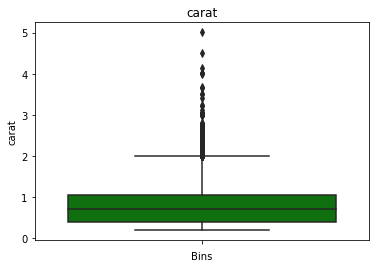

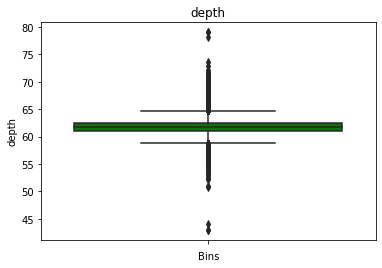

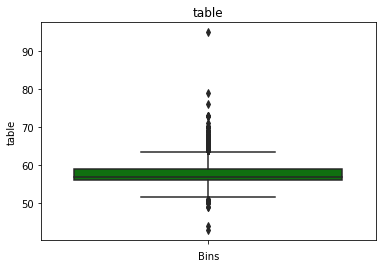

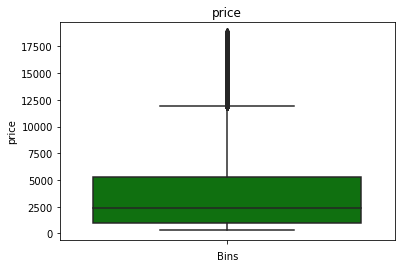

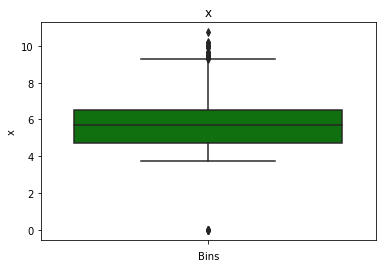

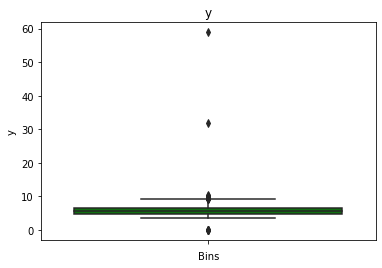

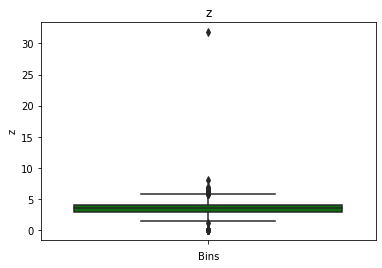

In [26]:
# plotting boxplots
colNames = xls.columns.tolist() # make a list of columns present in dataframes
for colName in colNames:
    if xls[colName].dtype == "object" or colName == 'id': # skip Id and string columns
        continue
    plt.figure()
    sns.boxplot(y=xls[colName], color='g') # plot the boxplot
    plt.title(colName) # provide title
    plt.ylabel(colName) # name Y axis
    plt.xlabel('Bins') # name X axis
    plt.show()



---

---

---











#Dataset Example - 2


---





**Importing Libraries**

    * Pandas for reading data file
    * Numpy for performing statistical calculations
    * Matplotlib and seaborn for visualization
    * Scipy.stats for Skewness and Kurtosis





In [27]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

***To see all the columns which are present in the dataset***

In [12]:
pd.set_option("display.max_columns",None)#To see all the columns which are present in the dataset

***#Mounting Google Drive***

In [13]:
%cd ..
from google.colab import drive
drive.mount('/content/gdrive')

/
Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


***Unzip the dataset.zip.***

In [14]:
!unzip /content/gdrive/MyDrive/dataset.zip


unzip:  cannot find or open /content/gdrive/MyDrive/dataset.zip, /content/gdrive/MyDrive/dataset.zip.zip or /content/gdrive/MyDrive/dataset.zip.ZIP.



**Reading dataset**

    df is dataframe .
    pd.read_excel reads the excel file.
    head Function prints the first five rows of the dataset. *italicized text*

**Description of data**

    Data belongs to student category which contains fname , age and gender column.
    Fname contins the name of students, age column contains the age of the students and grade column contains the marks obtained. *italicized text*



In [29]:
df=pd.read_excel('/content/gdrive/MyDrive/FDS/gradedata.xlsx')
df.head()

,Unnamed: 0,fname,lname,gender,age,exercise,hours,grade,address
0,0,Marcia,Pugh,female,17,3,10,82.40,"9253 Richardson Road, Matawan, NJ 07747"
1,1,Kadeem,Morrison,male,18,4,4,78.20,"33 Spring Dr., Taunton, MA 02780"
2,2,Nash,Powell,male,18,5,9,79.30,"41 Hill Avenue, Mentor, OH 44060"
3,3,Noelani,Wagner,female,14,2,7,83.20,"8839 Marshall St., Miami, FL 33125"
4,4,Noelani,Cherry,female,18,4,15,87.40,"8304 Charles Rd., Lewis Center, OH 43035"



**Measures of Central Tendency**

    Mean
        The sum of a collection of numbers divided by the count of numbers in the collection.
  
    Median
        The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution.
   
    Mode
        The mode is the value that appears most often in a set of data values.


**Where the measures of central tendency used?**

    The above three values are used in handling null and outlier values in Machine learning, in Image processing mean and median plays an important role , we use mean and median for applying threshold values on the particular image.
    cv2.ADAPTIVE_THRESH_MEAN_C threshold value is the mean of neighbourhood area.

    cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value.



In [30]:
df_mean=df.mean()
print("*Mean of columns age and grade*")
print(df_mean)
df_median=df.median()
print("*Median of columns age and grade*")
print(df_median)
df_mode=df.mode()
print("*Mode of columns age and grade*")
print(df_mode)

*Mean of columns age and grade*
Unnamed: 0   999.50
age           16.58
exercise       3.00
hours         10.99
grade         82.56
dtype: float64
*Median of columns age and grade*
Unnamed: 0   999.50
age           17.00
exercise       3.00
hours         11.00
grade         82.70
dtype: float64
*Mode of columns age and grade*
      Unnamed: 0  fname    lname  gender   age  exercise  hours  grade  \
0              0  Dolan   Conley  female 17.00      4.00  11.00 100.00   
1              1    NaN   Harvey    male   NaN       NaN    NaN    NaN   
2              2    NaN  Oconnor     NaN   NaN       NaN    NaN    NaN   
3              3    NaN  Randall     NaN   NaN       NaN    NaN    NaN   
4              4    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
...          ...    ...      ...     ...   ...       ...    ...    ...   
1995        1995    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
1996        1996    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
1997  

<ipython-input-30-952bfb550b35>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean=df.mean()
<ipython-input-30-952bfb550b35>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median=df.median()



**Measures of Variability**

    Standard Deviation
       The standard deviation is a measure of the amount of variation or dispersion of a set of values.
    
    Variance
        The term variance refers to a statistical measurement of the spread between numbers in a data set.
   
    Min and Max Variables
        Min is the minimum value in the column or in dataset.
        Max is the maximum value in the column or in dataset.

**Where the measures of variability is used?**

    Standard deviation is used to know how data is spread so we can find some good insigths from it.
    Example:-

        If we are working with data which consist column of years, tax rate, sales amount etc. so, after applying standard deviation we will get to know at which year the tax rate or sales amount was more or less.
        
    Min and Max both are used to find range of the array or particilar column, so we can detect the outliers.



In [31]:
print("Standard deviation of columns age and grade")
print(df.std())
print("Variance of columns age and grade  ")
print(df.var())
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

Standard deviation of columns age and grade
Unnamed: 0   577.49
age            1.70
exercise       1.42
hours          4.06
grade          9.75
dtype: float64
Variance of columns age and grade  
Unnamed: 0   333,500.00
age                2.88
exercise           2.03
hours             16.52
grade             95.02
dtype: float64
The Minimum value are
Unnamed: 0                                    0
fname                                     Aaron
lname                                   Acevedo
gender                                   female
age                                          14
exercise                                      0
hours                                         0
grade                                     32.00
address       1 Chapel Ave., Cheshire, CT 06410
dtype: object
The Maximum value are
Unnamed: 0                                    1999
fname                                       Zorita
lname                                    Zimmerman
gender                     

<ipython-input-31-851b2ba1dc55>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())
<ipython-input-31-851b2ba1dc55>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())




    Skewness and Kurtosis

        Skewness is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
        Kurtosis is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

**Where do we use Skewness and Kurtosis ?**

    Skewness can be used to obtain approximate probabilities and quantiles of distributions (such as value at risk in finance) via the Cornish-Fisher expansion.
    
    Kurtosis is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.



In [32]:
age_skew=skew(df["age"])
grade_skew=skew(df["grade"])
print("The skewness of column age is : ",age_skew)
print("The skewness of column grade is : ",grade_skew)

The skewness of column age is :  -0.0752765542984972
The skewness of column grade is :  -0.21238878400270958


In [33]:


age_kurtosis=kurtosis(df["age"])
print("The kurtosis of column age is ",age_kurtosis)
grade_kurtosis=kurtosis(df["grade"])
print("The kurtosis of column grade is ",grade_kurtosis)



The kurtosis of column age is  -1.2366835884614293
The kurtosis of column grade is  -0.19902555827060553



 * Range
        The Range is the difference between the lowest and highest values.

    Given that the range can easily be computed with information on the maximum and minimum value of the data set.

    Users requiring only a rough indication of the data may prefer to use this indicator over more sophisticated measures of spread.



In [34]:
age_range=(df["age"].max())-(df["age"].min())
print("The range of column age is :",age_range)

The range of column age is : 5


In [35]:
grade_range=(df["grade"].max())-(df["grade"].min())
print("The range of column grade is :",grade_range)

The range of column grade is : 68.0




 * Percentiles/Quartiles
        A percentile is a measure at which that percentage of the total values are the same as or below that measure. For example, 90% of the data values lie below the 90th percentile, whereas 10% of the data values lie below the 10th percentile.

        Quartiles are values that divide a (part of a) data table into four groups containing an approximately equal number of observations. The total of 100% is split into four equal parts: 25%, 50%, 75% and 100%.

    Percentiles are used to understand and interpret data.
    Quartiles are used to summarize a group of numbers.



In [36]:
print("50th percentile of age column is:",np.percentile(df["age"],50))
print("25th percentile of age column is:",np.percentile(df["age"],25))
print("75th percentile of age column is:",np.percentile(df["age"],75))

50th percentile of age column is: 17.0
25th percentile of age column is: 15.0
75th percentile of age column is: 18.0


In [37]:


print("50th percentile of grade column is:",np.percentile(df["grade"],50))
print("25th percentile of grade column is:",np.percentile(df["grade"],25))
print("75th percentile of grade column is:",np.percentile(df["grade"],75))



50th percentile of grade column is: 82.7
25th percentile of grade column is: 75.57499999999999
75th percentile of grade column is: 89.7


In [38]:
print("Q2th quantile of age column is : ",np.quantile(df["age"],.50))
print("Q1th quantile of age column is : ",np.quantile(df["age"],.25))
print("Q3th quantile of age column is : ",np.quantile(df["age"],.75))

Q2th quantile of age column is :  17.0
Q1th quantile of age column is :  15.0
Q3th quantile of age column is :  18.0


In [39]:
print("Q2 quantile of grade column is : ",np.quantile(df["grade"],.50))
print("Q1th quantile of grade column is : ",np.quantile(df["grade"],.25))
print("Q3 quantile of grade column is : ",np.quantile(df["grade"],.75))

Q2 quantile of grade column is :  82.7
Q1th quantile of grade column is :  75.57499999999999
Q3 quantile of grade column is :  89.7




  * Box Plots
        A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary.
        Lowest observation
        Highest observation
        Lower Quartile
        Upper Quartile
        Median



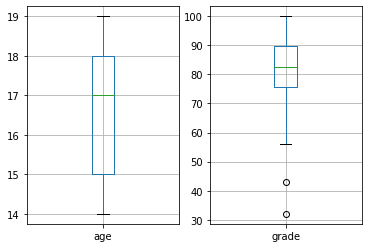

In [40]:
plt.figure()
plt.subplot(1,2,1)
df.boxplot(column="age")
plt.subplot(1,2,2)
df.boxplot(column="grade")
plt.show()



---

---

---







#Dataset Example - 3


---




### Importing Libraries
 - Pandas for reading data file
 - Numpy for performing statistical calculations 
 - Matplotlib and seaborn for visualization 
 - Scipy.stats for Skewness and Kurtosis

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.stats import skew
from scipy.stats import kurtosis

- To see all the columns which are present in the dataset

In [ ]:
pd.set_option("display.max_columns",None)#To see all the columns which are present in the dataset

### Reading dataset
- df is dataframe .
- pd.read_excel reads the excel file.
- head Function prints the first five rows of the dataset.

### Description of data
- Data belongs to student category which contains **fname** , **age** and **gender** column.
- **Fname** contins the name of students, **age** column contains the age of the students and **grade** column contains the marks obtained. 

In [ ]:
df=pd.read_excel("data1.xlsx")
df.head()

,fname,age,grade
0,Baker,14,90
1,Josephine,19,100
2,Calvin,15,66
3,Aretha,17,84
4,Britanney,19,66


### Measures of Central Tendency
- **Mean**
    - The sum of a collection of numbers divided by the count of numbers in the collection.
- **Median** 
    - The median is the value separating the higher half from the lower half of a data sample, a population, or a probability distribution. 
- **Mode**
    - The mode is the value that appears most often in a set of data values.

#### Where the measures of central tendency used?
- The above three values are used in handling null and outlier values in **Machine learning**, in **Image processing** mean and median plays an important role , we use mean and median for applying threshold values on the particular image.
- cv2.ADAPTIVE_THRESH_MEAN_C threshold value is the mean of neighbourhood area.
- cv2.medianBlur() computes the median of all the pixels under the kernel window and the central pixel is replaced with this median value. 


#### Example of median blur 

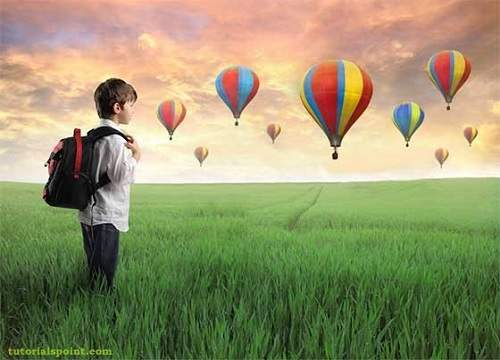
<br></br>
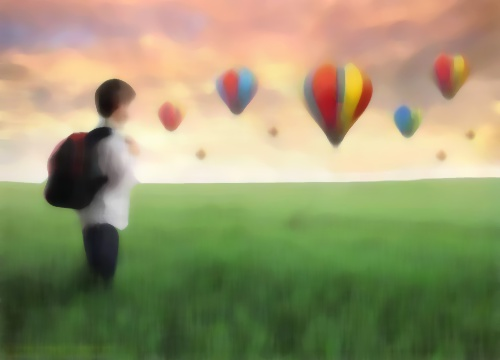

In [41]:
df_mean=df.mean()
print("*Mean of columns age and grade*")
print(df_mean)
df_median=df.median()
print("*Median of columns age and grade*")
print(df_median)
df_mode=df.mode()
print("*Mode of columns age and grade*")
print(df_mode)

*Mean of columns age and grade*
Unnamed: 0   999.50
age           16.58
exercise       3.00
hours         10.99
grade         82.56
dtype: float64
*Median of columns age and grade*
Unnamed: 0   999.50
age           17.00
exercise       3.00
hours         11.00
grade         82.70
dtype: float64
*Mode of columns age and grade*
      Unnamed: 0  fname    lname  gender   age  exercise  hours  grade  \
0              0  Dolan   Conley  female 17.00      4.00  11.00 100.00   
1              1    NaN   Harvey    male   NaN       NaN    NaN    NaN   
2              2    NaN  Oconnor     NaN   NaN       NaN    NaN    NaN   
3              3    NaN  Randall     NaN   NaN       NaN    NaN    NaN   
4              4    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
...          ...    ...      ...     ...   ...       ...    ...    ...   
1995        1995    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
1996        1996    NaN      NaN     NaN   NaN       NaN    NaN    NaN   
1997  

<ipython-input-41-952bfb550b35>:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_mean=df.mean()
<ipython-input-41-952bfb550b35>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df_median=df.median()


#### Measures of Variability 
- **Standard Deviation**
    - The standard deviation is a measure of the amount of variation or dispersion of a set of values.
- **Variance**
    - The term variance refers to a statistical measurement of the spread between numbers in a data set.
- **Min and Max Variables**
    - Min is the minimum value in the column or in dataset.
    - Max is the maximum value in the column or in dataset.


#### Where the measures of variability is used?
- **Standard deviation** is used to know how data is spread so we can find some good insigths from it.
- Example:- 
    - If we are working with data which consist column of years, tax rate, sales amount etc. so, after applying standard deviation we will get to know at which year the tax rate or sales amount was more or less.
- **Min and Max** both are used to find range of the array or particilar column, so we can detect the outliers.

In [42]:
print("Standard deviation of columns age and grade")
print(df.std())
print("Variance of columns age and grade  ")
print(df.var())
print("The Minimum value are" )
print(df.min())
print("The Maximum value are" )
print(df.max())

Standard deviation of columns age and grade
Unnamed: 0   577.49
age            1.70
exercise       1.42
hours          4.06
grade          9.75
dtype: float64
Variance of columns age and grade  
Unnamed: 0   333,500.00
age                2.88
exercise           2.03
hours             16.52
grade             95.02
dtype: float64
The Minimum value are
Unnamed: 0                                    0
fname                                     Aaron
lname                                   Acevedo
gender                                   female
age                                          14
exercise                                      0
hours                                         0
grade                                     32.00
address       1 Chapel Ave., Cheshire, CT 06410
dtype: object
The Maximum value are
Unnamed: 0                                    1999
fname                                       Zorita
lname                                    Zimmerman
gender                     

<ipython-input-42-851b2ba1dc55>:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.std())
<ipython-input-42-851b2ba1dc55>:4: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  print(df.var())


- **Skewness and Kurtosis**
    - **Skewness** is a measure of the symmetry of a distribution. The highest point of a distribution is its mode.
    - **Kurtosis** is a statistical measure that defines how heavily the tails of a distribution differ from the tails of a normal distribution.

#### Where do we use Skewness and Kurtosis ?
- **Skewness** can be used to obtain approximate probabilities and quantiles of distributions (such as value at risk in finance) via the Cornish-Fisher expansion.
- **Kurtosis** is used to describe the extreme values in one versus the other tail. It is actually the measure of outliers present in the distribution . High kurtosis in a data set is an indicator that data has heavy tails or outliers.

In [43]:
age_skew=skew(df["age"])
grade_skew=skew(df["grade"])
print("The skewness of column age is : ",age_skew)
print("The skewness of column grade is : ",grade_skew)

The skewness of column age is :  -0.0752765542984972
The skewness of column grade is :  -0.21238878400270958


In [44]:
age_kurtosis=kurtosis(df["age"])
print("The kurtosis of column age is ",age_kurtosis)
grade_kurtosis=kurtosis(df["grade"])
print("The kurtosis of column grade is ",grade_kurtosis)

The kurtosis of column age is  -1.2366835884614293
The kurtosis of column grade is  -0.19902555827060553


- **Range**
    - The Range is the difference between the lowest and highest values. 
- Given that the range can easily be computed with information on the maximum and minimum value of the data set.
- Users requiring only a rough indication of the data may prefer to use this indicator over more sophisticated measures of spread. 

In [ ]:
age_range=(df["age"].max())-(df["age"].min())
print("The range of column age is :",age_range)

The range of column age is : 5


In [45]:
grade_range=(df["grade"].max())-(df["grade"].min())
print("The range of column grade is :",grade_range)

The range of column grade is : 68.0


- **Percentiles/Quartiles**
    - A **percentile** is a measure at which that percentage of the total values are the same as or below that measure. For example, 90% of the data values lie below the 90th percentile, whereas 10% of the data values lie below the 10th percentile.
    - **Quartiles** are values that divide a (part of a) data table into four groups containing an approximately equal number of observations. The total of 100% is split into four equal parts: 25%, 50%, 75% and 100%.

- Percentiles are used to understand and interpret data. 
- Quartiles are used to summarize a group of numbers. 

In [46]:
print("50th percentile of age column is:",np.percentile(df["age"],50))
print("25th percentile of age column is:",np.percentile(df["age"],25))
print("75th percentile of age column is:",np.percentile(df["age"],75))

50th percentile of age column is: 17.0
25th percentile of age column is: 15.0
75th percentile of age column is: 18.0


In [47]:
print("50th percentile of grade column is:",np.percentile(df["grade"],50))
print("25th percentile of grade column is:",np.percentile(df["grade"],25))
print("75th percentile of grade column is:",np.percentile(df["grade"],75))

50th percentile of grade column is: 82.7
25th percentile of grade column is: 75.57499999999999
75th percentile of grade column is: 89.7


In [48]:
print("Q2th quantile of age column is : ",np.quantile(df["age"],.50))
print("Q1th quantile of age column is : ",np.quantile(df["age"],.25))
print("Q3th quantile of age column is : ",np.quantile(df["age"],.75))

Q2th quantile of age column is :  17.0
Q1th quantile of age column is :  15.0
Q3th quantile of age column is :  18.0


In [49]:
print("Q2 quantile of grade column is : ",np.quantile(df["grade"],.50))
print("Q1th quantile of grade column is : ",np.quantile(df["grade"],.25))
print("Q3 quantile of grade column is : ",np.quantile(df["grade"],.75))

Q2 quantile of grade column is :  82.7
Q1th quantile of grade column is :  75.57499999999999
Q3 quantile of grade column is :  89.7


- **Box Plots**
    - A box and whisker plot (sometimes called a boxplot) is a graph that presents information from a five-number summary. 
    - Lowest observation
    - Highest observation
    - Lower Quartile
    - Upper Quartile 
    - Median 

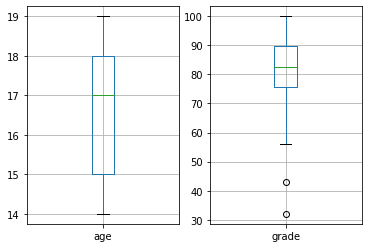

In [50]:
plt.figure()
plt.subplot(1,2,1)
df.boxplot(column="age")
plt.subplot(1,2,2)
df.boxplot(column="grade")
plt.show()



---

---

---





